<a href="https://colab.research.google.com/github/Seanzhengocean1/temp/blob/main/Copy_of_Stock_Project_06162023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/EUR_STOCK_DATA.csv")

In [3]:
df

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.234920,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.235210,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.234350,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.234910,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.236800,1.238700,1.236285,1.238205
...,...,...,...,...,...,...
12885,11.12.2020 04:00:00.000,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,11.12.2020 08:00:00.000,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,11.12.2020 12:00:00.000,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,11.12.2020 16:00:00.000,23094.5300,1.606720,1.609540,1.605880,1.607315


In [4]:
print(type(df["Gmt time"].iloc[0]))

<class 'str'>


In [5]:
# BETWEEN OPEN AND CLOSE
# If Datetime is in string only the 1st that is day was being comapred
df['Gmt time']=pd.to_datetime(df['Gmt time'])

def return_data_for_period():
  date1=input("Enter first Date for time period format D.M.Y :- ")
  date2=input("Enter Second Date for time period format D.M.Y :- ")
  # 0th index has date 1st has Month 2nd has year
  # 2012-12-17 04:00:00 .datetime()
  # 2012-12-17 .date()
  date1=date1.split(".")
  date2=date2.split(".")
  date1=datetime.datetime(year=int(date1[2]),month=int(date1[1]),day=int(date1[0]))
  date2=datetime.datetime(year=int(date2[2]),month=int(date2[1]),day=int(date2[0]))
  date_filt1=df[df["Gmt time"]>date1]
  return date_filt1[date_filt1["Gmt time"]<date2]

Enter first Date for time period format D.M.Y :- 01.03.2010
Enter Second Date for time period format D.M.Y :- 11.12.2020


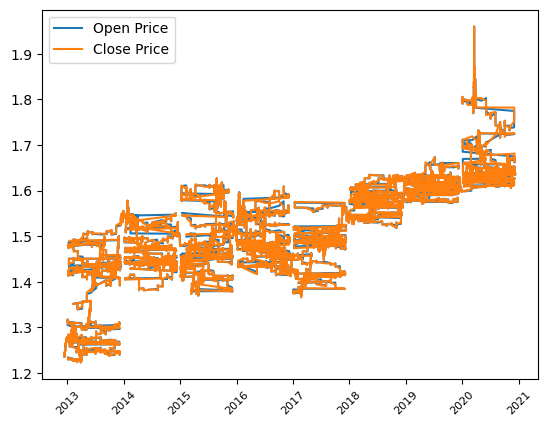

In [6]:
open_Close_filtered_Data=return_data_for_period()
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Open'],label="Open Price")
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Close'],label="Close Price")
plt.xticks(rotation=45,fontsize=8)
plt.legend()
plt.show()

In [ ]:
low_high_filtered_Data=return_data_for_period()
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['High'],label="High Price")
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Low'],label="Low Price")
plt.xticks(rotation=45,fontsize=8)
plt.legend()
plt.show()

In [ ]:
# Data Preprocessing and Cleaning and EDA
# Making More features from current features to help the model learn better

In [ ]:
# Plot Open vs Close Between any time period entered by the user
# Plot High vs Low Between any time period entered by the user
# Check which months over the year had highest Volume
# Study what are technical Indicators
# See Seasonal Trends in Closing Price and Find out the months for high Volitality

In [ ]:
# Check which months over the year had highest Volume
# caluclate mean volume for each month each year
# 1 data frames that has 12 jan,feb,march,april,may,june,july..... and rows will be number of year

In [ ]:
def find_data_for_all_months(column_to_mean):
  years=[]
  all_months_data=[]
  for index in range(9):
    years.append(2012+index)
  for k in range(1,13): # Number of months january is 1.................. 12 is december
    temp_monthly_data=[]
    for j in years:
      if k ==12:
        # date1 is year/01/12
        # date2 is year+1/01/01
        date1=datetime.datetime(year=j,month=k,day=1)
        date2=datetime.datetime(year=j+1,month=1,day=1)
      else:
        date1=datetime.datetime(year=j,month=k,day=1)
        date2=datetime.datetime(year=j,month=k+1,day=1)
      date_filt1=df[df["Gmt time"]>=date1]
      date_filter_2=date_filt1[date_filt1["Gmt time"]<date2]
      temp_monthly_data.append(date_filter_2[column_to_mean].mean())
    all_months_data.append(temp_monthly_data)
  return all_months_data

In [ ]:
all_months_of_data=find_data_for_all_months("Close")
import numpy as np
data_of_months_as_a_array=np.array(all_months_of_data).T

In [ ]:
months=["Jan","Feb","March","April","May","June","July","August","September","October","Nov","Dec"]
df_months=pd.DataFrame(data_of_months_as_a_array,columns=months)

In [ ]:
df_months

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_months.mean())
plt.xticks(rotation=90)
plt.show()

In [ ]:
all_months_of_data=find_data_for_all_months("Volume")
import numpy as np
data_of_months_as_a_array=np.array(all_months_of_data).T
months=["Jan","Feb","March","April","May","June","July","August","September","October","Nov","Dec"]
df_months=pd.DataFrame(data_of_months_as_a_array,columns=months)
import matplotlib.pyplot as plt
plt.plot(df_months.mean())
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Simple moving Average
# Cumulative Moving Average
# Explonentital Movie Average

#Team 1
# anand,fatta gurang,pratisth,rabin,sagar,samita

#Team 2
# sean,shanti,smriti,manoj,veera,yog